<a href="https://colab.research.google.com/github/yahav1349/Number-of-steps-preditnios/blob/main/internet_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# General

In [ ]:
import pandas as pd
import numpy as np

# Modelling
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from zipfile import ZipFile
import random
import warnings
warnings.filterwarnings('ignore')

In [ ]:
def norm(x, y, z):
  return np.sqrt(float(x)**2 + float(y)**2 + float(z) **2)

def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

In [ ]:
def split(file_name):
  train_list = []
  test_list = []
  with ZipFile(file_name, "r") as f:
      for name in f.namelist():
        rand = random.uniform(0,1)
        if rand >= 0.8:
          test_list.append(name)
        else:
          train_list.append(name)
  return train_list, test_list

In [ ]:
def train_test(curr_list, bad_files):
  mean_norm_list = []
  std_norm_list = []
  max_norm_list = []
  range_list = []
  classification_list = []
  number_of_steps_list = []
  num_rows = []
  for i,name in enumerate(curr_list):
    if name in bad_files:
        data = pd.read_csv(name, skiprows=6)
        head = pd.read_csv(name, nrows=4)
    else:
        data = pd.read_csv(name,skiprows=5)
        head = pd.read_csv(name, nrows=3)
    classification = head.iloc[1,1]
    steps = head.iloc[2,1]
    data['Norm'] = ["" for i in range(len(data))]
    data['Classification'] = [classification for i in range(len(data))]
    for row in range(len(data)):
      x,y,z = data.iloc[row, 1], data.iloc[row, 2], data.iloc[row, 3]
      if  not is_float(x) or not is_float(y) or not is_float(z):
        data.drop(data.index[row])
      else:
        data['Norm'].iloc[row] = norm(x,y,z)
    mean_norm_list.append(np.mean(data['Norm']))
    std_norm_list.append(np.std(data['Norm']))
    max_norm_list.append(np.max(data['Norm']))
    range_list.append(np.max(data['Norm']) - np.min(data['Norm']))
    classification_list.append(data['Classification'][0])
    num_rows.append(len(data))
    number_of_steps_list.append(steps)
  data_final = {
      'Mean Norm': mean_norm_list,
      'Std Norm': std_norm_list,
      'Max Norm': max_norm_list,
      'Range': range_list,
      'Number of Rows': num_rows,
      'Number of Steps': number_of_steps_list,
      'Classification': classification_list
  }
  # Create the DataFrame
  df = pd.DataFrame(data_final)
  return df

In [ ]:
def find_bad_lines(df):
  bad_index = []
  for row in range(len(df)):
    x,y,z = df.iloc[row, 1], df.iloc[row, 2], df.iloc[row, 3]
    if '-' in str(x)[1:] or '-' in str(y)[1:] or '-' in str(z)[1:]:
      bad_index.append(row)
  return bad_index

In [ ]:
def clean_train(train_df, bad_index):
  train_df = train_df.drop(train_df.index[[i for i in bad_index]])
  # train_df = train_df.iloc[:, :-1]
  train_df = train_df.dropna()
  return train_df

In [ ]:
def clean_test(test_df, bad_index):
  test_df = test_df.drop(test_df.index[[i for i in bad_index]])
  # test_df = test_df[['Time [sec]','ACC X','ACC Y', 'ACC Z',	'Norm','Classification']]
  test_df = test_df.dropna()
  return test_df

In [ ]:
def null_rows(matrix):
  null_list = []
  null_values = matrix.isnull()
  for column in null_values.columns:
      for index, value in null_values[column].items():
          if value:
              if index not in null_list:
                null_list.append(index)
              print(f"Null value found at index {index} in column {column}")
  return null_list

In [ ]:
def return_train_X_y(train):
  train['Number of Steps'] = pd.to_numeric(train['Number of Steps'], errors='coerce')
  X = train.iloc[: , :-1]
  y = train['Classification']
  X['min'] = X['Max Norm'] - X['Range']
  mapping = {'Running': 1, 'Walking': 0,'RUNNING': 1, 'WALKING': 0}
  y= y.map(mapping)
  return X,y

In [ ]:
def return_test_X_y(test):
  test['Number of Steps'] = pd.to_numeric(test['Number of Steps'], errors='coerce')
  null_list = null_rows(test.iloc[: ,:-1])
  test = test.drop(test.index[[i for i in null_list]])
  X = test.iloc[: ,:-1]
  y = test['Classification']
  X['min'] = X['Max Norm'] - X['Range']
  mapping = {'Running': 1, 'Walking': 0,'RUNNING': 1, 'WALKING': 0, }
  y= y.map(mapping)
  return X,y

In [ ]:
file_name = 'project_IOT.zip'
bad_files = ["6_run_3_1.csv", "6_run_4_1.csv", "6_walk_5_1.csv", "11_walk_1_1.csv", "11_walk_2_1.csv", "11_walk_3_1.csv", "11_walk_5_1.csv"]
train_list, test_list = split(file_name)
train_df = train_test(train_list, bad_files)
bad_train_index = find_bad_lines(train_df)
train = clean_train(train_df, bad_train_index)
X,y = return_train_X_y(train)

In [ ]:
train_df

,Mean Norm,Std Norm,Max Norm,Range,Number of Rows,Number of Steps,Classification
0,11.444922,6.141134,23.795315,22.850169,578,100,Running
1,10.109185,2.585022,19.302562,16.641134,957,100,Walking
2,9.997269,2.352843,19.361459,15.743932,972,100,Walking
3,9.944439,2.328066,18.746010,14.478693,931,100,Walking
4,12.950121,9.130435,34.675666,33.882571,922,164,Running
...,...,...,...,...,...,...,...
176,10.815573,2.210419,19.759722,13.842484,494,75,Walking
177,10.925536,2.238666,20.523560,13.248211,499,75,Walking
178,11.001765,2.384220,20.240121,13.138051,479,77,Walking
179,11.500150,6.300456,27.148175,25.496085,548,100,Running


In [ ]:
test_df = train_test(test_list, bad_files)
bad_test_index = find_bad_lines(test_df)
test = clean_test(test_df, bad_test_index)
X_test, y_test = return_test_X_y(test)

# Running/Walking Classification

## Model

In [ ]:
!pip install xgboost

**Cross validation for gboost parameters**

In [ ]:
#Actiave if needed
# X_g_boost = X.rename(columns={'Time [sec]':'Time'})
# from sklearn.model_selection import GridSearchCV
# import xgboost as xgb

# # Step 1: Define the base model
# model = xgb.XGBClassifier()

# # Step 2: Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'learning_rate': [0.01, 0.001],
#     'n_estimators': [100, 200],
#     'max_depth': [3, 4],
#     'subsample': [0.8, 0.9],
#     'reg_alpha': [0, 0.1],
#     'reg_lambda': [0, 0.1]
# }

# # Step 3: Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X_g_boost, y)

# # Step 4: Get the best model and its hyperparameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Hyperparameters:", best_params)
# print("Best Accuracy Score:", best_score)

**Random forest cross validation**

In [ ]:
#Actiave if needed
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import GridSearchCV

# # Step 1: Define the base model
# model = RandomForestClassifier()

# # Step 2: Define the parameter grid for hyperparameter tuning
# param_grid = {
#     'n_estimators': [100, 200],
#     'max_depth': [None, 5],
#     'min_samples_split': [2],
#     'min_samples_leaf': [1],
#     'max_features': ['auto', 'sqrt']
# }

# # Step 3: Perform grid search with cross-validation
# grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
# grid_search.fit(X, y)

# # Step 4: Get the best model and its hyperparameters
# best_model = grid_search.best_estimator_
# best_params = grid_search.best_params_
# best_score = grid_search.best_score_

# print("Best Hyperparameters:", best_params)
# print("Best Accuracy Score:", best_score)


**Predictions with the chosen parameters**

In [ ]:
train['Classification'].unique()

array(['Running', 'Walking', 'RUNNING', 'WALKING'], dtype=object)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
gboost_model = xgb.XGBClassifier(learning_rate= 0.01, max_depth= 3, n_estimators = 100, reg_alpha= 0.1, reg_lambda=0.1, subsample= 0.8)
gboost_model.fit(X, y)
rf_model = RandomForestClassifier(max_features= 'sqrt', min_samples_leaf= 1, min_samples_split=2, n_estimators=200)
rf_model.fit(X, y)

RandomForestClassifier(n_estimators=200)

In [ ]:
y_pred_rf = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_rf)
print("random forest rows Accuracy:", accuracy*100)
# X_test_boost = X_test.rename(columns={'Time [sec]':'Time'})
y_pred_gboost = gboost_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred_gboost)
print("gboost rows Accuracy:", accuracy*100)

random forest rows Accuracy: 95.34883720930233
gboost rows Accuracy: 95.34883720930233


In [ ]:
def predict_on_file(bad_files):
  count = 0
  for i,name in enumerate(test_list):
    if 'run' in name:
      classification = 1
    else:
      classification = 0
    test_file = train_test([name], bad_files)
    bad_test_file_index = find_bad_lines(test_file)
    test_file_cleaned =  test_file.drop(test_file.index[[i for i in bad_test_file_index]])
    if 'Time[sec]' in test_file_cleaned.columns:
      test_file_cleaned  = test_file_cleaned .rename(columns={'Time[sec]': 'Time [sec]'})
    for column in test_file_cleaned.columns[1::]:
        test_file_cleaned  = test_file_cleaned .rename(columns={column:column.strip()})
    X_test,_ = return_test_X_y(test_file_cleaned)
    y_pred = rf_model.predict(X_test)
    if round(np.mean(y_pred))==classification:
      count+=1
  print(f'random forest accuracy: {count*100/len(test_list)}%')

In [ ]:
def predict_on_gboost(bad_files):
  count = 0
  for i,name in enumerate(test_list):
    if 'run' in name:
      classification = 1
    else:
      classification = 0
    test_file = train_test([name], bad_files)
    bad_test_file_index = find_bad_lines(test_file)
    test_file_cleaned =  test_file.drop(test_file.index[[i for i in bad_test_file_index]])
    if 'Time[sec]' in test_file_cleaned.columns:
      test_file_cleaned  = test_file_cleaned .rename(columns={'Time[sec]': 'Time [sec]'})
    for column in test_file_cleaned.columns[1::]:
        test_file_cleaned  = test_file_cleaned .rename(columns={column:column.strip()})
    X_test,_ = return_test_X_y(test_file_cleaned)
    # X_test_boost = X_test.rename(columns={'Time [sec]':'Time'})
    y_pred = gboost_model.predict(X_test)
    if round(np.mean(y_pred))==classification:
      count+=1
  print(f'gboost accuracy: {count*100/len(test_list)}%')

In [ ]:
predict_on_gboost(bad_files)

gboost accuracy: 95.34883720930233%


In [ ]:
predict_on_file(bad_files)

random forest accuracy: 95.34883720930233%


## Statistical analysis

In [ ]:
def outliers(all_df):
  outlier = []
  norms = all_df['Mean Norm']
  for i,k in enumerate(norms):
    if k >25:
      outlier.append(i)
  return outlier

In [ ]:
def plot_it(norms, fixed_df, fixed_y):
  fig, ax = plt.subplots()

  colors = ['red' if label == 1 else 'blue' for label in fixed_y['Classification']]
  scatter = ax.scatter(fixed_df.index, norms, c=colors)

  # Create custom legend handles and labels
  legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10)]
  legend_labels = ['Running','Walking']

  # Create the legend with custom handles and labels
  ax.legend(legend_handles, legend_labels, loc='upper right', title='Classification')
  ax.set_xlabel('Index')
  ax.set_ylabel('Norm Standard Deviation')

  plt.show()

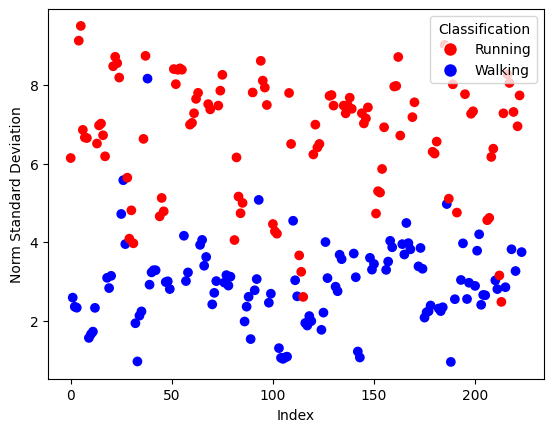

In [ ]:
import matplotlib.pyplot as plt
all_df = pd.concat([X,X_test]).reset_index()
labels = pd.concat([y, y_test]).reset_index()
outliers_values = outliers(all_df)
fixed_df = all_df.drop(outliers_values)
fixed_y = labels.drop(outliers_values)
fixed_df.reset_index()
fixed_y.reset_index()
norms = fixed_df['Std Norm']
plot_it(norms, fixed_df, fixed_y)

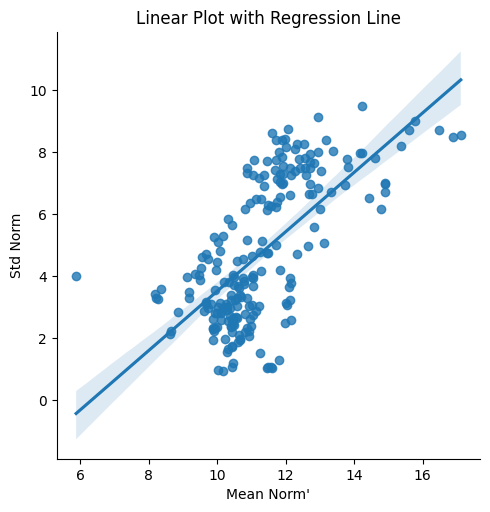

In [ ]:
# Create the linear plot with regression line
import seaborn as sns
fixed_df['Classification'] = fixed_y['Classification']
sns.lmplot(x='Mean Norm', y='Std Norm', data=fixed_df)

# Set plot title and labels
plt.title("Linear Plot with Regression Line")
plt.xlabel("Mean Norm'")
plt.ylabel("Std Norm")

# Display the plot
plt.show()


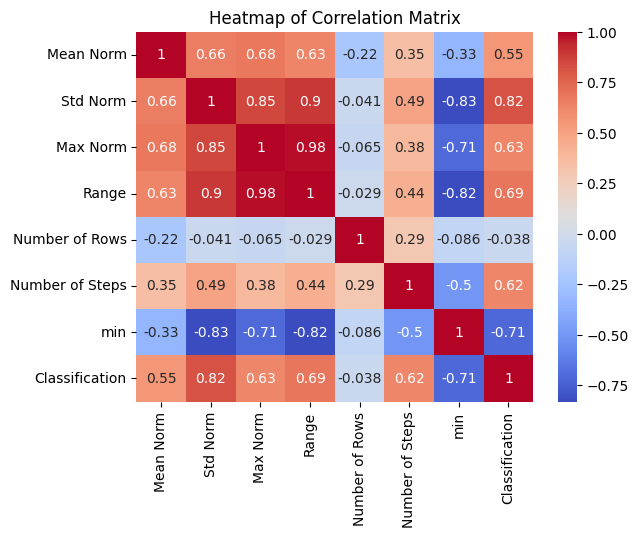

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the heatmap
fixed_df['Classification'] = fixed_y['Classification']
df_no_index = fixed_df.drop(columns=['index'])
df_no_index['Classification'] = df_no_index['Classification'].astype(int)
# Create the heatmap
sns.heatmap(df_no_index.corr(), annot=True, cmap='coolwarm')

# Set plot title
plt.title("Heatmap of Correlation Matrix")

# Display the plot
plt.show()

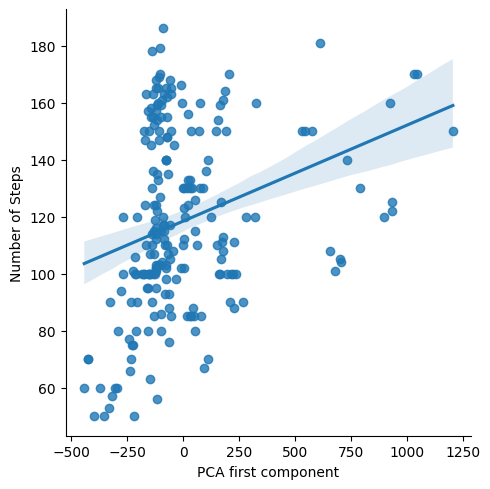

In [ ]:
# Perform PCA
from sklearn.decomposition import PCA
fixed_df = all_df.drop(outliers_values, axis=0).reset_index()
fixed_y = labels.drop(outliers_values,axis=0).reset_index()
pca = PCA(n_components=1)
principal_components = pca.fit_transform(fixed_df)
principal_df = pd.DataFrame(data=principal_components, columns=['PCA first component'])
principal_df['Number of Steps'] = fixed_df['Number of Steps']
sns.lmplot(x='PCA first component', y='Number of Steps', data=principal_df)
plt.show()
# Convert the principal components array back to a DataFrame

In [ ]:
def plot_it_2(norms, fixed_df, fixed_y):
  fig, ax = plt.subplots()

  colors = ['red' if label == 1 else 'blue' for label in fixed_y['Classification']]
  scatter = ax.scatter(fixed_df['Mean Norm'], fixed_df['Std Norm'], c=colors)

  # Create custom legend handles and labels
  legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='red', markersize=10),
                    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='blue', markersize=10)]
  legend_labels = [ 'Running', 'Walking']

  # Create the legend with custom handles and labels
  ax.legend(legend_handles, legend_labels, loc='upper left', title='Classification')
  ax.set_xlabel('Mean Norm')
  ax.set_ylabel('Norm Standard Deviation')

  plt.show()

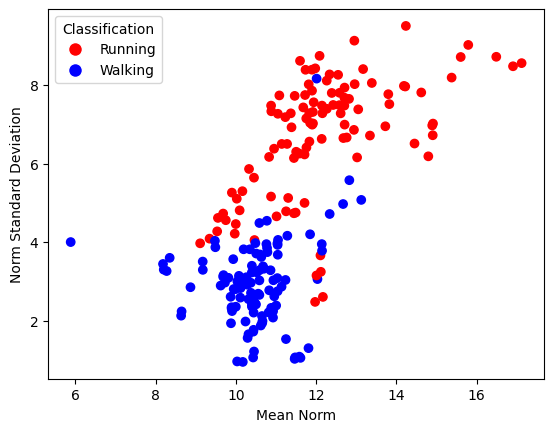

In [ ]:
plot_it_2(norms, fixed_df, fixed_y)

In [ ]:
# # Create the linear plot with regression line
# fixed_y = labels.drop(outliers_values,axis=0).reset_index()
# fixed_df['Classification'] = fixed_y['Classification']
# colors = ['red' if label == 1 else 'blue' for label in fixed_df['Classification']]
# # mapping = {0:'Walking', 1:'Running'}
# # fixed_df['Classification'] = fixed_df['Classification'].map(mapping)
# plt.scatter(x='Mean Norm', y='Std Norm', data=fixed_df,c=colors)
# legend_labels = fixed_df['Classification']  # Replace with your list of labels
# scatter_legend = plt.legend(title='Classification', labels=fixed_df['Classification'] )

# # Set plot title and labels
# plt.title("Linear Plot with Regression Line")
# plt.xlabel("Mean Norm")
# plt.ylabel("Std Norm")

# # Add the legend to the plot
# plt.gca().add_artist(scatter_legend)

# # Display the plot
# plt.show()

In [ ]:
fixed_df.columns

Index(['level_0', 'index', 'Mean Norm', 'Std Norm', 'Max Norm', 'Range',
       'Number of Rows', 'Number of Steps', 'min'],
      dtype='object')

# NUmber of Steps Classification

In [ ]:
def train_test_steps(curr_list, bad_files):
  mean_norm_list = []
  std_norm_list = []
  max_norm_list = []
  range_list = []
  classification_list = []
  number_of_steps_list = []
  num_rows = []
  for i,name in enumerate(curr_list):
    if name in bad_files:
        data = pd.read_csv(name, skiprows=6)
        head = pd.read_csv(name, nrows=4)
    else:
        data = pd.read_csv(name,skiprows=5)
        head = pd.read_csv(name, nrows=3)
    classification = head.iloc[1,1]
    steps = head.iloc[2,1]
    data['Norm'] = ["" for i in range(len(data))]
    data['Classification'] = [classification for i in range(len(data))]
    for row in range(len(data)):
      x,y,z = data.iloc[row, 1], data.iloc[row, 2], data.iloc[row, 3]
      if  not is_float(x) or not is_float(y) or not is_float(z):
        data.drop(data.index[row])
      else:
        data['Norm'].iloc[row] = norm(x,y,z)
    mean_norm_list.append(np.mean(data['Norm']))
    std_norm_list.append(np.std(data['Norm']))
    max_norm_list.append(np.max(data['Norm']))
    range_list.append(np.max(data['Norm']) - np.min(data['Norm']))
    classification_list.append(data['Classification'][0])
    num_rows.append(len(data))
    number_of_steps_list.append(steps)
  data_final = {
      'Mean Norm': mean_norm_list,
      'Std Norm': std_norm_list,
      'Max Norm': max_norm_list,
      'Range': range_list,
      'Classification': classification_list,
      'Number of Rows': num_rows,
      'Number of Steps': number_of_steps_list
  }
  # Create the DataFrame
  df = pd.DataFrame(data_final)
  return df

In [ ]:
def X_y_steps(df):
  df['Number of Steps'] = pd.to_numeric(df['Number of Steps'], errors='coerce')
  # train['ACC X'] = pd.to_numeric(train['ACC X'], errors='coerce')
  # train['ACC Y'] = pd.to_numeric(train['ACC Y'], errors='coerce')
  # train['ACC Z'] = pd.to_numeric(train['ACC Z'], errors='coerce')
  # train['Norm'] = pd.to_numeric(train['Norm'], errors='coerce')
  mapping = {'Running': 1, 'Walking': 0,'RUNNING': 1, 'WALKING': 0, }
  df['Classification'] = df['Classification'].map(mapping)
  # Separate the target variable 'y' and the feature matrix 'X'
  X = df.iloc[:,:-1]  # Columns 1, 2, 3, 4, and 6
  X['min'] = X['Max Norm'] - X['Range']
  y = df.iloc[:, -1]  # Column 5
  return X,y

In [ ]:
file_name = 'project_IOT.zip'
bad_files = ["6_run_3_1.csv", "6_run_4_1.csv", "6_walk_5_1.csv", "11_walk_1_1.csv", "11_walk_2_1.csv", "11_walk_3_1.csv", "11_walk_5_1.csv"]
train_list, test_list = split(file_name)
train_df = train_test_steps(train_list, bad_files)
bad_train_index = find_bad_lines(train_df)
train = clean_train(train_df, bad_train_index)
X_train,y_train = X_y_steps(train)

In [ ]:
test_df = train_test_steps(test_list, bad_files)
bad_test_index = find_bad_lines(test_df)
test = clean_test(test_df, bad_test_index)
X_t, y_t = X_y_steps(test)

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
gb_regressor = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42)

# Fit the regressor to your training data
gb_regressor.fit(X_train, y_train)

# Use the trained regressor to make predictions
y_pred = gb_regressor.predict(X_t)

# Evaluate the model using mean squared error
rmse = np.sqrt(mean_squared_error(y_t, y_pred))
print("Root Mean Squared Error:", rmse)

Root Mean Squared Error: 15.63085426324465


## Analyzing

In [ ]:
max(y_t)

165

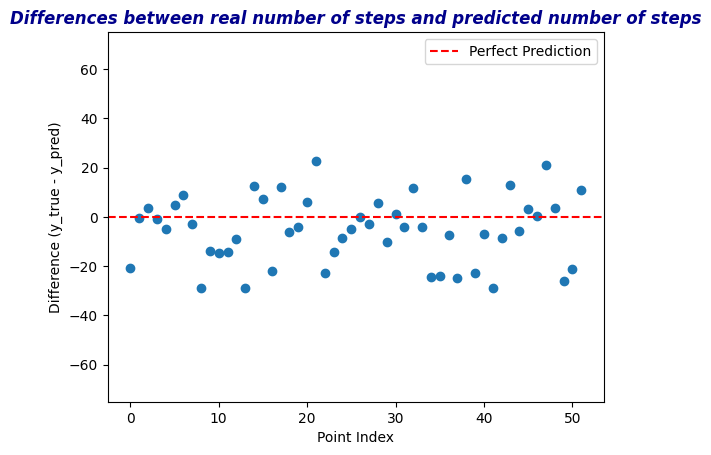

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Calculate the Z-scores for the data
z_scores = (y_t - y_pred) / np.std(y_t - y_pred)

# Define a threshold for outlier detection (e.g., z-score > 3 or < -3)
threshold = 1.96

# Filter out the outliers
filtered_indices = np.where(np.abs(z_scores) < threshold)[0]
filtered_y_t = y_t[filtered_indices]
filtered_y_pred = y_pred[filtered_indices]

# # Create the scatter plot with outliers removed
index = [i for i in range(len(filtered_y_t))]
plt.scatter(index, (filtered_y_t - filtered_y_pred))

# Add a line at y=0
plt.axhline(y=0, color='red', linestyle='--', label='Perfect Prediction')

# Set the y-axis limits
plt.ylim(-75, 75)

# Set the y-axis label
plt.ylabel('Difference (y_true - y_pred)')

# Set the x-axis label
plt.xlabel('Point Index')

# Add legend
plt.legend()
# Add a title to the graph
plt.title('Differences between real number of steps and predicted number of steps', color='darkblue',fontstyle=
          'italic',fontweight='bold')
plt.show()